In [315]:
#import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from ast import literal_eval


import warnings; warnings.simplefilter('ignore')


In [316]:
movies_df = pd.read_csv("G:\Study\Szakdolgozat\input\movies_metadata.csv")
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [317]:
#The funcition input must be a list that contains a json's of genres, or empty, it takes out the name of each genre
def getGenres(row):
    if len(row) == 0:
        return []
    result = []
    eval_row = literal_eval(row)
    for item in eval_row:
        result.append(str.lower(item['name']))
    return result

In [318]:
movies_df['genres'] = movies_df['genres'].fillna("").apply(getGenres)
movies_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[animation, comedy, family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[adventure, fantasy, family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[romance, comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[comedy, drama, romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[drama, family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,[drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[action, drama, thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [319]:
#Since literal_eval not working correctly on collection row,had to parse it otherwise
#Making the belongs_to_collection column readable
import re

def getCollection(row):
    return str(re.findall("(?<='name':)(.*)',",row)).split(',')[0].split(']')[0][4:-1]


In [320]:
movies_df['belongs_to_collection'] = movies_df['belongs_to_collection'].fillna("").apply(lambda x : getCollection(str(x)))
movies_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[animation, comedy, family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,,65000000,"[adventure, fantasy, family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[romance, comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,,16000000,"[comedy, drama, romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,,0,"[drama, family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,,0,[drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,,0,"[action, drama, thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [321]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  45466 non-null  object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [322]:
#Counting each Genre so we can later plot it

number_of_each_gen = {}
for row in movies_df['genres']:
    for genre in row:
        if genre in number_of_each_gen:
            number_of_each_gen[genre] += 1
        else:
            number_of_each_gen[genre] = 1
            
number_of_each_gen = dict(sorted(number_of_each_gen.items(), key=lambda item: item[1]))

<AxesSubplot:title={'center':'Number of each genres in the dataframe'}, xlabel='Genres', ylabel='Number_of_movies'>

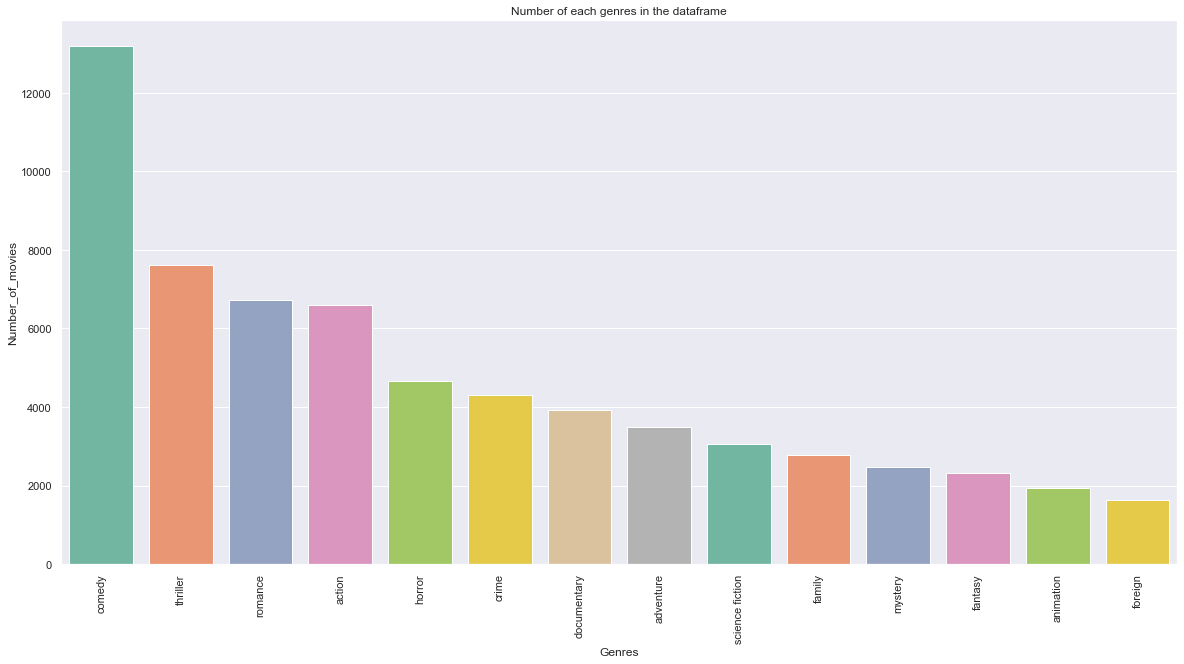

In [323]:
keys = list(number_of_each_gen.keys())[len(number_of_each_gen.keys())-15:-1]
keys.reverse()
values = [float(number_of_each_gen[k]) for k in keys]
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Number of each genres in the dataframe")
plt.xticks(rotation = 90)
plt.ylabel('Number_of_movies')
plt.xlabel('Genres')
sns.barplot(x=keys, y=values,ax = ax,palette="Set2")

In [324]:
movies_df['release_year'] = movies_df['release_date'].apply(lambda date : np.nan if len(str(date)) < 10 else date[0:4])
movies_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year
0,False,Toy Story Collection,30000000,"[animation, comedy, family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,,65000000,"[adventure, fantasy, family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,Grumpy Old Men Collection,0,"[romance, comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,False,,16000000,"[comedy, drama, romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,False,Father of the Bride Collection,0,[comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,,0,"[drama, family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN
45462,False,,0,[drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,2011
45463,False,,0,"[action, drama, thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003
45464,False,,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917


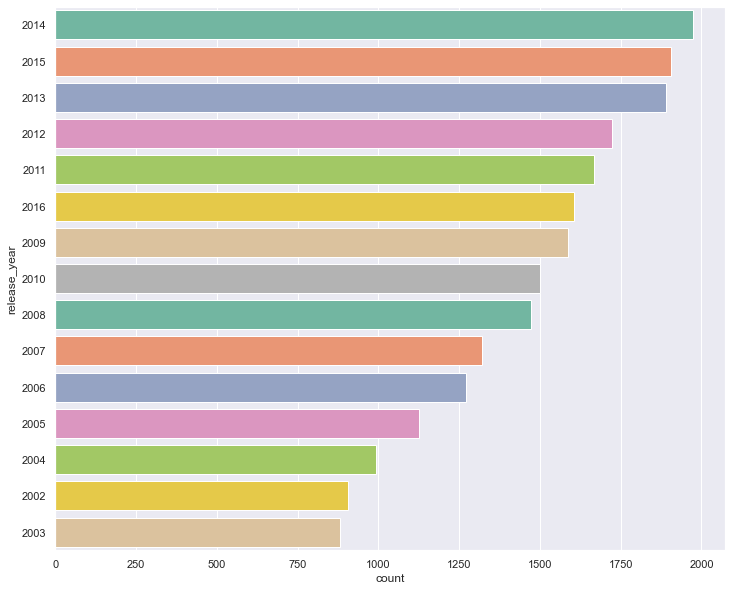

In [325]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data=movies_df, palette="Set2", order=movies_df['release_year'].value_counts().index[0:15])

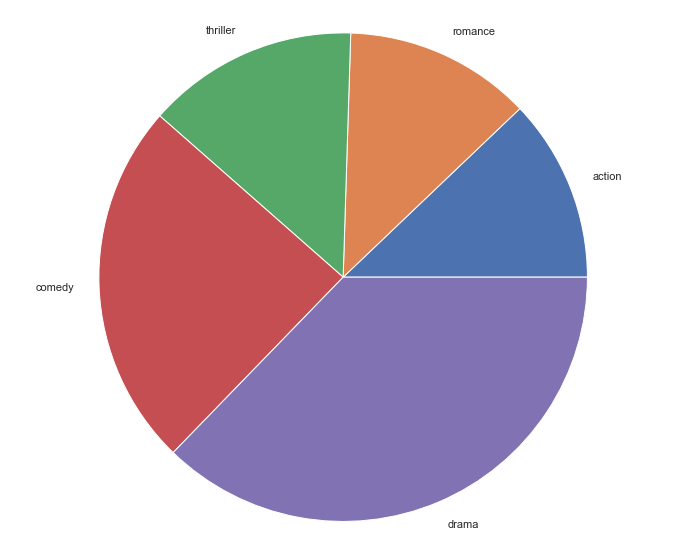

In [326]:
top_5_gen = sorted(number_of_each_gen.items(), key=lambda item : item[1])[-5:]
labels = []
values = []
for gen in top_5_gen:
    labels.append(gen[0])
    values.append(gen[1])

plt.figure(figsize=(12,10))
plt.pie(values, labels=labels)

plt.axis('equal')
plt.show()


In [327]:
movies_df = movies_df[movies_df['vote_count'].notnull()]

In [328]:
movies_df['vote_count'] = movies_df['vote_count'].astype(int)
movies_df = movies_df[movies_df['vote_count'] != 0]
movies_df['vote_average'] = movies_df['vote_average'].astype(int)
movies_df['id'] = movies_df['id'].astype(np.int64)

In [329]:
print(movies_df['vote_count'].describe(),'\n\n',movies_df['vote_average'].describe())

count    42561.000000
mean       117.382886
std        506.901699
min          1.000000
25%          4.000000
50%         11.000000
75%         38.000000
max      14075.000000
Name: vote_count, dtype: float64 

 count    42561.000000
mean         5.602148
std          1.312070
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         10.000000
Name: vote_average, dtype: float64


In [330]:
def VoteCountGroup(value):
        if(0 < value <=50):
            return "Less than 50"
        elif(50<value<=100):
            return "More than 50 less than 101"
        elif(100<value<=300):
            return "More than 100 less than 300"
        elif(300<value<=800):
            return "More than 300 less than 800"
        elif(800<value<=1200):
            return "More than 800 less than 1200"
        elif(1200<value<=2000):
            return "More than 1200 less than 2000"
        elif(2000<value<=5000):
            return "More than 2000 less than 5000"
        elif(5000<value<=8000):
            return "More than 5000 less than 8000"
        elif(8000<value):
            return "More than 8000"

In [331]:
movies_df['vote_count_group'] = movies_df['vote_count'].fillna(0).apply(VoteCountGroup)

In [332]:
movies_df.groupby('vote_count_group').count()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year
vote_count_group,,,,,,,,,,,,,,,,,,,,,
Less than 50,33513,33513,33513,33513,4695,33513,33502,33507,33513,32795,...,33513,33356,33513,33458,12744,33513,33513,33513,33513,33480
More than 100 less than 300,2988,2988,2988,2988,726,2988,2988,2988,2988,2977,...,2988,2988,2988,2988,2322,2988,2988,2988,2988,2988
More than 1200 less than 2000,426,426,426,426,234,426,426,426,426,426,...,426,426,426,426,421,426,426,426,426,426
More than 2000 less than 5000,411,411,411,411,288,411,411,411,411,411,...,411,411,411,411,402,411,411,411,411,411
More than 300 less than 800,1645,1645,1645,1645,618,1645,1645,1645,1645,1645,...,1645,1645,1645,1645,1492,1645,1645,1645,1645,1645
More than 50 less than 101,3028,3028,3028,3028,623,3028,3028,3028,3028,3004,...,3028,3027,3028,3027,1875,3028,3028,3028,3028,3027
More than 5000 less than 8000,79,79,79,79,73,79,79,79,79,79,...,79,79,79,79,77,79,79,79,79,79
More than 800 less than 1200,449,449,449,449,194,449,449,449,449,449,...,449,449,449,449,426,449,449,449,449,449
More than 8000,22,22,22,22,19,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


<AxesSubplot:xlabel='vote_count_group', ylabel='count'>

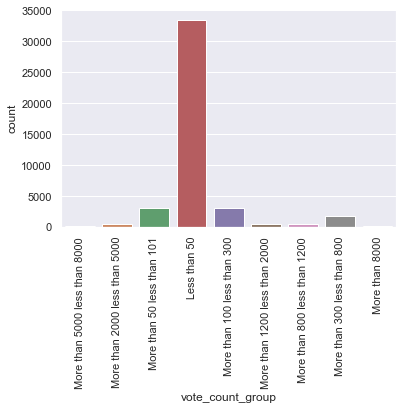

In [333]:
#Visualizing the 
plt.xticks(rotation = 90)
sns.countplot(x='vote_count_group',data = movies_df)

In [334]:
movies_df.groupby('vote_average').count()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_count,release_year,vote_count_group
vote_average,,,,,,,,,,,,,,,,,,,,,
0,113,113,113,113,15,113,113,113,113,110,...,113,113,113,113,36,113,113,113,112,113
1,194,194,194,194,24,194,194,194,194,183,...,194,189,194,192,89,194,194,194,192,194
2,530,530,530,530,62,530,530,530,530,517,...,530,527,530,529,251,530,530,530,528,530
3,1614,1614,1614,1614,179,1614,1613,1614,1614,1579,...,1614,1609,1614,1608,834,1614,1614,1614,1612,1614
4,4538,4538,4538,4538,670,4538,4537,4537,4538,4447,...,4538,4515,4538,4534,2222,4538,4538,4538,4536,4538
5,11329,11329,11329,11329,1849,11329,11328,11327,11329,11139,...,11329,11305,11329,11317,5675,11329,11329,11329,11325,11329
6,14643,14643,14643,14643,2713,14643,14638,14640,14643,14422,...,14643,14596,14643,14627,6976,14643,14643,14643,14636,14643
7,7705,7705,7705,7705,1569,7705,7703,7705,7705,7584,...,7705,7670,7705,7698,3171,7705,7705,7705,7700,7705
8,1498,1498,1498,1498,312,1498,1498,1498,1498,1447,...,1498,1488,1498,1493,431,1498,1498,1498,1496,1498


<AxesSubplot:title={'center':'Movie vote average distribution'}, xlabel='vote_average', ylabel='count'>

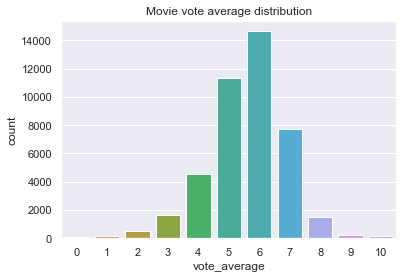

In [335]:
plt.title("Movie vote average distribution")
sns.countplot(x='vote_average',data = movies_df)

In [336]:
m = np.percentile(movies_df['vote_count'],80)
m

56.0

In [337]:
movies_df = movies_df[movies_df['vote_count'] >= m]
C = movies_df['vote_average'].mean()

In [338]:
#https://en.wikipedia.org/wiki/IMDb#Rankings
#W = R*v+C*m / v+m
#R Average vote value
#C Average vote value across the dataframe
#v Number of vote on a movie
#m Minimum nubmer of votes required

def Weightedratingv1(row):
    R = row['vote_average'] #Avarge vote value
    v = row['vote_count'] #Number of votes
    return ((R*v)/(v+m))+ ((C*m) / (v+m))
    

In [339]:
movies_df['WR'] = movies_df.apply(Weightedratingv1,axis = 1)
movies_df.shape

(8562, 27)

In [340]:
movies_df = movies_df[['id','belongs_to_collection','genres','original_title','overview','tagline','WR']]

In [341]:
movies_df["overview"] = movies_df["overview"].fillna("")
movies_df["tagline"] = movies_df["tagline"].fillna("")

In [342]:
movies_df

,id,belongs_to_collection,genres,original_title,overview,tagline,WR
0,862,Toy Story Collection,"[animation, comedy, family]",Toy Story,"Led by Woody, Andy's toys live happily in his ...",,6.988946
1,8844,,"[adventure, fantasy, family]",Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,5.998188
2,15602,Grumpy Old Men Collection,"[romance, comedy]",Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,5.969772
4,11862,Father of the Bride Collection,[comedy],Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.225006
5,949,,"[action, crime, drama, thriller]",Heat,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,6.968860
...,...,...,...,...,...,...,...
45268,277839,,[comedy],Pattaya,Franky and Krimo dream of leaving the grey gri...,,5.246537
45339,430365,,[comedy],À bras ouverts,Jean-Étienne Fougerole is an intellectual bohe...,Thanks for the invitation!,5.343509
45343,248705,The Visitors Collection,[comedy],Les Visiteurs: La Révolution,"Stuck in the corridors of time, Godefroy de Mo...",,4.482181
45437,455661,,"[family, animation, romance, comedy]",In a Heartbeat,A closeted boy runs the risk of being outed by...,The Heart Wants What The Heart Wants,7.423397


In [343]:
keywords_df = pd.read_csv("G:\Study\Szakdolgozat\input\\keywords.csv")
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [344]:
#Input need to be a json like stuctor or empty
#Function collects into a list the keywords of a moive


def getKeywords(row):
    keywords = []
    if (len(row) == 0):
        return keywords
    else:
        for key in row:
            keywords.append(key["name"])
        return keywords
            

In [345]:
keywords_df["keywords"] = keywords_df["keywords"].fillna("").apply(literal_eval).apply(getKeywords)

In [346]:
credits_df = pd.read_csv("G:\Study\Szakdolgozat\input\\credits.csv")
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [347]:
#Input need to be a json like stuctor or empty
def getCastMembers(row):
    castMembers = set()
    if len(row) == 0:
        return list(castMembers)
    else:
        for member in row:
            castMembers.add(str.lower(member['name']).replace(" ",""))
    return list(castMembers)

In [348]:
#Input need to be a json like stuctor or empty
def getCrewMembers(row,requestedRoles):
    crewMembers = set()
    if len(row) == 0:
        return list(crewMembers)
    else:
        for member in row:
            if member['job'] in requestedRoles:
                crewMembers.add(str.lower(member['name']).replace(" ",""))
    return list(crewMembers)

In [349]:
requestedRoles = ['Director','Screenplay','Producer','Executive Producer','Writer']
credits_df['cast'] = credits_df['cast'].fillna("").apply(literal_eval).apply(getCastMembers)
credits_df['crew'] = credits_df['crew'].fillna("").apply(literal_eval).apply(getCastMembers)
credits_df.head()

,cast,crew,id
0,"[johnmorris, tomhanks, anniepotts, lauriemetca...","[patjackson, dondavis, galynsusman, timholland...",862
1,"[lloydberry, malcolmstewart, kirstendunst, rob...","[kylebalda, scottkroopf, joejohnston, jamesd.b...",8844
2,"[kevinpollak, darylhannah, jacklemmon, ann-mar...","[howarddeutch, jackkeller, markstevenjohnson]",15602
3,"[whitneyhouston, lorettadevine, lelarochon, my...","[kennethedmonds, caronk, deborahschindler, ron...",31357
4,"[petermichaelgoetz, kimberlywilliams-paisley, ...","[alberthackett, elliotdavis, nancymeyers, alan...",11862


In [350]:
movies_df = movies_df.merge(keywords_df,how='left',on='id')
movies_df = movies_df.merge(credits_df,how='left',on='id')
movies_df.head()

,id,belongs_to_collection,genres,original_title,overview,tagline,WR,keywords,cast,crew
0,862,Toy Story Collection,"[animation, comedy, family]",Toy Story,"Led by Woody, Andy's toys live happily in his ...",,6.988946,"[jealousy, toy, boy, friendship, friends, riva...","[johnmorris, tomhanks, anniepotts, lauriemetca...","[patjackson, dondavis, galynsusman, timholland..."
1,8844,,"[adventure, fantasy, family]",Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,5.998188,"[board game, disappearance, based on children'...","[lloydberry, malcolmstewart, kirstendunst, rob...","[kylebalda, scottkroopf, joejohnston, jamesd.b..."
2,15602,Grumpy Old Men Collection,"[romance, comedy]",Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,5.969772,"[fishing, best friend, duringcreditsstinger, o...","[kevinpollak, darylhannah, jacklemmon, ann-mar...","[howarddeutch, jackkeller, markstevenjohnson]"
3,11862,Father of the Bride Collection,[comedy],Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.225006,"[baby, midlife crisis, confidence, aging, daug...","[petermichaelgoetz, kimberlywilliams-paisley, ...","[alberthackett, elliotdavis, nancymeyers, alan..."
4,949,,"[action, crime, drama, thriller]",Heat,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,6.968860,"[robbery, detective, bank, obsession, chase, s...","[dannytrejo, thomasrosales,jr., rickavery, rob...","[dovhoenig, buddcarr, pasqualebuba, terryd.fra..."


In [351]:
movies_df.head()

,id,belongs_to_collection,genres,original_title,overview,tagline,WR,keywords,cast,crew
0,862,Toy Story Collection,"[animation, comedy, family]",Toy Story,"Led by Woody, Andy's toys live happily in his ...",,6.988946,"[jealousy, toy, boy, friendship, friends, riva...","[johnmorris, tomhanks, anniepotts, lauriemetca...","[patjackson, dondavis, galynsusman, timholland..."
1,8844,,"[adventure, fantasy, family]",Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,5.998188,"[board game, disappearance, based on children'...","[lloydberry, malcolmstewart, kirstendunst, rob...","[kylebalda, scottkroopf, joejohnston, jamesd.b..."
2,15602,Grumpy Old Men Collection,"[romance, comedy]",Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,5.969772,"[fishing, best friend, duringcreditsstinger, o...","[kevinpollak, darylhannah, jacklemmon, ann-mar...","[howarddeutch, jackkeller, markstevenjohnson]"
3,11862,Father of the Bride Collection,[comedy],Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.225006,"[baby, midlife crisis, confidence, aging, daug...","[petermichaelgoetz, kimberlywilliams-paisley, ...","[alberthackett, elliotdavis, nancymeyers, alan..."
4,949,,"[action, crime, drama, thriller]",Heat,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,6.968860,"[robbery, detective, bank, obsession, chase, s...","[dannytrejo, thomasrosales,jr., rickavery, rob...","[dovhoenig, buddcarr, pasqualebuba, terryd.fra..."


In [358]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language="english")

movies_df["keywords"] = movies_df["keywords"].fillna("").apply(lambda keywords : [stemmer.stem(keyword) for keyword in keywords]  if len(keywords) > 0 else [])

In [361]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentences(row):
    """
    """

,id,belongs_to_collection,genres,original_title,overview,tagline,WR,keywords,cast,crew,snowball
0,862,Toy Story Collection,"[animation, comedy, family]",Toy Story,"Led by Woody, Andy's toys live happily in his ...",,6.988946,"[jealousy, toy, boy, friendship, friends, riva...","[johnmorris, tomhanks, anniepotts, lauriemetca...","[patjackson, dondavis, galynsusman, timholland...","[jealousi, toy, boy, friendship, friend, rival..."
1,8844,,"[adventure, fantasy, family]",Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,5.998188,"[board game, disappearance, based on children'...","[lloydberry, malcolmstewart, kirstendunst, rob...","[kylebalda, scottkroopf, joejohnston, jamesd.b...","[board gam, disappear, based on children's boo..."
2,15602,Grumpy Old Men Collection,"[romance, comedy]",Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,5.969772,"[fishing, best friend, duringcreditsstinger, o...","[kevinpollak, darylhannah, jacklemmon, ann-mar...","[howarddeutch, jackkeller, markstevenjohnson]","[fish, best friend, duringcreditssting, old men]"
3,11862,Father of the Bride Collection,[comedy],Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.225006,"[baby, midlife crisis, confidence, aging, daug...","[petermichaelgoetz, kimberlywilliams-paisley, ...","[alberthackett, elliotdavis, nancymeyers, alan...","[babi, midlife crisi, confid, age, daughter, m..."
4,949,,"[action, crime, drama, thriller]",Heat,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,6.968860,"[robbery, detective, bank, obsession, chase, s...","[dannytrejo, thomasrosales,jr., rickavery, rob...","[dovhoenig, buddcarr, pasqualebuba, terryd.fra...","[robberi, detect, bank, obsess, chase, shoot, ..."
...,...,...,...,...,...,...,...,...,...,...,...
8691,277839,,[comedy],Pattaya,Franky and Krimo dream of leaving the grey gri...,,5.246537,[],"[doniaeden, anouartoubali, jonathansamson, set...","[emmanuelleyouchnovski, nicolasaltmayer, stéph...",[]
8692,430365,,[comedy],À bras ouverts,Jean-Étienne Fougerole is an intellectual bohe...,Thanks for the invitation!,5.343509,[],"[ioanavisalon, mirelanicolau, nanougarcia, osc...","[guylaurent, philippeguilbert, marcdechauveron...",[]
8693,248705,The Visitors Collection,[comedy],Les Visiteurs: La Révolution,"Stuck in the corridors of time, Godefroy de Mo...",,4.482181,"[nazis, castle, time travel, robespierre]","[alexandrevonsivers, horatiataittinger, götzot...","[jean-mariepoiré, christianclavier]","[nazi, castl, time travel, robespierr]"
8694,455661,,"[family, animation, romance, comedy]",In a Heartbeat,A closeted boy runs the risk of being outed by...,The Heart Wants What The Heart Wants,7.423397,"[love, teenager, lgbt, short]",[],"[laraarikan, estebanbravo, nickainsworth, artu...","[love, teenag, lgbt, short]"
